In [2]:
import gym
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.ppo.policies import MlpPolicy
from utils.adversary_env import AdversaryEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Load target model
target_model = A2C.load("../a2c/model/lunarlander_v2_a2c_3M_to_11M")

In [3]:
# Test target model - for info on why the env is wrapped with Monitor check the evaluate_policy function
mean_reward, std_reward = evaluate_policy(target_model, Monitor(gym.make('LunarLander-v2')), n_eval_episodes=50)
print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 261.59 +/- 55.02


In [4]:
# Create adversary with adversary env
# adversary_env = AdversaryEnv("LunarLander-v2", target_model)
# adversary = PPO(MlpPolicy, adversary_env, verbose=1)

In [5]:
# Train adversary
# log_dir = "./out/training-log/"
# log_path = log_dir + f"adversary-lunarlander-v2/"
# save_dir = "./models/adversary-lunarlander-v2/"

# timesteps = 50000

# adversary.learn(
#         total_timesteps=timesteps,
#         callback=None,
#         log_interval=-1,
#         eval_env=adversary_env, 
#         eval_freq=5000, 
#         n_eval_episodes=100,
#         tb_log_name='PPO',
#         eval_log_path=log_path, 
#         reset_num_timesteps=False
#         )

# # Save adversary
# adversary.save(save_dir + f"adversary_lunarlander_v2_{timesteps}")

In [6]:
# Load adversary
save_dir = "./models/adversary-lunarlander-v2/"

adversary = PPO.load(save_dir + f"adversary_lunarlander_v2_50000")
adversary_env = AdversaryEnv('LunarLander-v2', target_model)

In [7]:
import numpy as np
import pandas as pd
from uniform_attack import UniformAttack

# Evaluate uniform adversarial attack over different epsilon
data_dict = {
    'epsilon': [],
    'mean_rew': [],
    'mean_perturbation': [],
    'mean_n_timesteps': [],
    'mean_n_attacks': []
}

n_episodes = 50

for j in range(1, 50):
    epsilon = j/100

    all_episodes_rewards = []
    all_episodes_perturbation = []
    all_episodes_n_timesteps = []
    all_episodes_n_attacks = []

    for i in range(0, n_episodes):
        # Run attack on a2c model
        env = gym.make("LunarLander-v2")
        ua = UniformAttack(env=env, model=target_model, attack=adversary, epsilon=epsilon)
        ua.perform_attack()

        all_episodes_rewards.append(ua.reward_total)
        all_episodes_perturbation.append(ua.perturbation_total)
        all_episodes_n_timesteps.append(ua.frames_count)
        all_episodes_n_attacks.append(ua.n_attacks)

        ua.reset_attack()

    data_dict['epsilon'].append(epsilon)
    data_dict['mean_rew'].append(np.round(np.mean(all_episodes_rewards), 2))
    data_dict['mean_perturbation'].append(np.round(np.mean(all_episodes_perturbation), 2))
    data_dict['mean_n_timesteps'].append(np.round(np.mean(all_episodes_n_timesteps), 2))
    data_dict['mean_n_attacks'].append(np.round(np.mean(all_episodes_n_attacks), 2))

    print("------------------------------------------")
    print(
        f"Epsilon {data_dict['epsilon'][-1]}: \n \
        {data_dict['mean_rew'][-1]} mean rew, \n \
        {data_dict['mean_perturbation'][-1]} mean perturbation \n \
        {data_dict['mean_n_timesteps'][-1]} mean n timesteps \n \
        {data_dict['mean_n_attacks'][-1]} mean n attacks"
        )
    print("------------------------------------------")

------------------------------------------
Epsilon 0.01: 
         207.69 mean rew, 
         2.680000066757202 mean perturbation 
         302.96 mean n timesteps 
         302.96 mean n attacks
------------------------------------------
------------------------------------------
Epsilon 0.02: 
         103.56 mean rew, 
         4.730000019073486 mean perturbation 
         264.46 mean n timesteps 
         264.46 mean n attacks
------------------------------------------
------------------------------------------
Epsilon 0.03: 
         91.21 mean rew, 
         11.920000076293945 mean perturbation 
         439.02 mean n timesteps 
         439.02 mean n attacks
------------------------------------------
------------------------------------------
Epsilon 0.04: 
         69.42 mean rew, 
         11.199999809265137 mean perturbation 
         313.48 mean n timesteps 
         313.48 mean n attacks
------------------------------------------
------------------------------------------
E

In [15]:
print(data_dict)

{'epsilon': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49], 'mean_rew': [207.69, 103.56, 91.21, 69.42, 54.59, 27.61, 26.57, 20.92, 7.36, 5.49, 4.67, 1.75, -1.4, -15.73, -15.45, -18.81, -23.54, -22.3, -32.1, -41.77, -40.21, -46.81, -59.82, -51.18, -70.98, -66.2, -73.17, -84.37, -84.24, -99.19, -85.24, -105.57, -106.81, -105.25, -150.32, -165.45, -136.85, -158.13, -167.45, -173.74, -178.52, -180.46, -189.95, -227.22, -218.9, -217.51, -214.09, -243.94, -236.74], 'mean_perturbation': [2.68, 4.73, 11.92, 11.2, 12.29, 6.89, 9.13, 7.77, 8.42, 9.47, 12.19, 10.89, 11.15, 12.03, 12.54, 13.91, 14.63, 15.51, 16.01, 16.84, 17.72, 18.27, 18.56, 20.78, 20.91, 21.53, 21.69, 23.09, 24.64, 24.75, 26.24, 26.12, 27.39, 27.31, 29.58, 30.03, 30.76, 31.07, 31.6, 33.19,

In [16]:
# Create DataFrame
labels = ['epsilon', 'mean_rew', 'mean_perturbation', 'mean_n_timsteps', 'mean_n_attacks']

data_df = pd.DataFrame(
        data_dict, 
        columns=labels,
        )
data_df.set_index('epsilon', inplace=True)

# Save data as .csv file
with open("./out/data/" + "uniform_attack_epsilon", 'w') as f:
    data_df.to_csv(f)

data_df

,mean_rew,mean_perturbation,mean_n_timsteps,mean_n_attacks
epsilon,,,,
0.01,207.69,2.680000,NaN,302.96
0.02,103.56,4.730000,NaN,264.46
0.03,91.21,11.920000,NaN,439.02
0.04,69.42,11.200000,NaN,313.48
0.05,54.59,12.290000,NaN,270.50
0.06,27.61,6.890000,NaN,127.62
0.07,26.57,9.130000,NaN,144.80
0.08,20.92,7.770000,NaN,107.08
0.09,7.36,8.420000,NaN,102.56


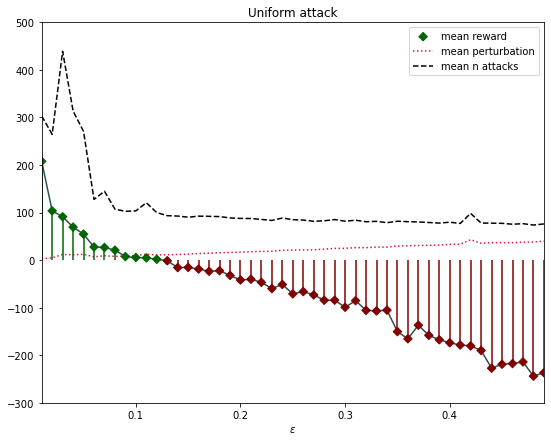

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load data
with open("./out/data/" + "uniform_attack_epsilon", 'r') as f:
    data_df = pd.read_csv(f, index_col=0)

# Plot data_df
plt.figure(figsize=(9,7))
plt.plot(data_df.index, data_df['mean_rew'], color='darkslategray', alpha=1, zorder=0)
plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dashed', alpha=1, zorder=0)

plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dashed', alpha=1, zorder=0)

plt.title("Uniform attack")
plt.legend()
plt.xlabel('$\epsilon$')
# plt.ylabel()
plt.axis([0.01, 0.49, -300, 500]) # plt.axis([xmin, xmax, ymin, ymax])
plt.show()